In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date as f_date, datetime, timedelta
from requests import HTTPError

In [35]:
root_url = """
https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show?name=&defaultValue=true&viewType=GRAPH&areaType=BZN&atch=false
&dateTime.dateTime={}|UTC|DAY
&biddingZone.values={}
&resolution.values=PT15M&resolution.values=PT30M&resolution.values=PT60M&dateTime.timezone=UTC&dateTime.timezone_input=UTC
"""

In [36]:
root_url.format("df", 'uio')

'\nhttps://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show?name=&defaultValue=true&viewType=GRAPH&areaType=BZN&atch=false\n&dateTime.dateTime=df|UTC|DAY\n&biddingZone.values=uio\n&resolution.values=PT15M&resolution.values=PT30M&resolution.values=PT60M&dateTime.timezone=UTC&dateTime.timezone_input=UTC\n'

In [ ]:
"05.01.2021+00:00"

In [39]:
dt = string_to_date("01-05-2021", format_date="%d-%m-%Y")

In [40]:
dt + timedelta(10)

datetime.datetime(2021, 5, 11, 0, 0)

In [59]:
def date_to_string(date: datetime.date, format_date="%d.%m.%Y+00:00"):
    return date.strftime(format_date)
def string_to_date(date_str: str, format_date="%m.%d.%Y+00:00"):
    return datetime.strptime(date_str, format_date)

def get_date_range(start_date:datetime.date, n_days):
    for n in range(n_days):
        yield start_date + timedelta(n)

In [133]:
dt > datetime.today()

False

In [61]:
dates

['01.01.2021+00:00',
 '02.01.2021+00:00',
 '03.01.2021+00:00',
 '04.01.2021+00:00',
 '05.01.2021+00:00',
 '06.01.2021+00:00',
 '07.01.2021+00:00',
 '08.01.2021+00:00',
 '09.01.2021+00:00',
 '10.01.2021+00:00']

### Tests

In [78]:
countries_params = {
    "germany":{"biddingZone":"CTY|10Y1001A1001A83F!BZN|10Y1001A1001A82H"},
    "france":{"biddingZone":"CTY|10YFR-RTE------C!BZN|10YFR-RTE------C"},
    "uk":{"biddingZone":"CTY|10Y1001A1001A92E!BZN|10YGB----------A"},
}

base_url = "https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show?name=&defaultValue=false&viewType=GRAPH&areaType=BZN&atch=false&dateTime.dateTime={}|UTC|DAY&biddingZone.values={}&resolution.values=PT15M&resolution.values=PT30M&resolution.values=PT60M&dateTime.timezone=UTC&dateTime.timezone_input=UTC"

date_start = date_to_string(f_date(2019, 1, 1))

In [79]:
url_fr = base_url.format(date_start, countries_params["france"]["biddingZone"])

In [80]:
r = requests.get(url_fr)

soup = BeautifulSoup(r.content,'html.parser')

soup


<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/resources/v_dev_relese_3.02.0-6773/images/icons/favicon.png" rel="icon" type="image/png"/>
<!--[if lte IE 9]>
    <meta http-equiv='cache-control' content='no-cache'>
    <meta http-equiv='expires' content='0'>
    <meta http-equiv='pragma' content='no-cache'>
    <![endif]-->
<title>Data view</title>
<!-- HTML5 correction scripts -->
<script src="/resources/v_dev_relese_3.02.0-6773/javascript/html5shiv/html5shiv.js" type="text/javascript"></script>
<script src="/resources/v_dev_relese_3.02.0-6773/javascript/html5shiv/html5shiv-printshiv.js" type="text/javascript"></script>
<!--  jQuery -->
<script src="/resources/v_dev_relese_3.02.0-6773/javascript/jquery/1.9/jquery.js" type="text/javascript"></script>
<script src="/resources/v_dev_relese_3.02.0-6773/javascript/jquery-ui/1.10/jquery-ui.js" type="text/javascript"></script>
<script src="/resources/v_dev_relese_3.02.0-6773/ja

In [75]:
url_fr

'https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show?name=&defaultValue=false&viewType=GRAPH&areaType=BZN&atch=false&dateTime.dateTime=01.01.2019+00:00|UTC|DAY&biddingZone.values=CTY|10YFR-RTE------C!BZN|10YFR-RTE------&resolution.values=PT15M&resolution.values=PT30M&resolution.values=PT60M&dateTime.timezone=UTC&dateTime.timezone_input=UTC'

In [76]:
true = "https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show?name=&defaultValue=false&viewType=GRAPH&areaType=BZN&atch=false&dateTime.dateTime=01.01.2019+00:00|UTC|DAY&biddingZone.values=CTY|10YFR-RTE------C!BZN|10YFR-RTE------C&resolution.values=PT15M&resolution.values=PT30M&resolution.values=PT60M&dateTime.timezone=UTC&dateTime.timezone_input=UTC"

In [77]:
true

'https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show?name=&defaultValue=false&viewType=GRAPH&areaType=BZN&atch=false&dateTime.dateTime=01.01.2019+00:00|UTC|DAY&biddingZone.values=CTY|10YFR-RTE------C!BZN|10YFR-RTE------C&resolution.values=PT15M&resolution.values=PT30M&resolution.values=PT60M&dateTime.timezone=UTC&dateTime.timezone_input=UTC'

### Concat json files

In [2]:
import os
os.chdir("../")

In [3]:
import glob
import os
import json

In [4]:
from pathlib import Path

In [36]:
def convert_prices_df(country, year, save=True):
    
    def open_json(file_path):
        with open(file_path, 'r') as f:
            return json.load(f)
    
    def format_df(df, year):
        idx = pd.date_range(f'01.01.{year}', f'12.31.{year} 23:00:00', freq="H")
        df.index = pd.DatetimeIndex(df.datetime)
        df = df.reindex(idx, fill_value='NaN').drop('datetime', axis=1)
        df.index = list(map(str, df.index))
        df = df.assign(value=df.value.astype(float))
        return df

    daily_list = []
    path_data = "/home/martin/Documents/Rhizome/Code/electricity_scraping/data"

    if not isinstance(year, str):
        year = str(year)
        
    for file_path in glob.glob(os.path.join(path_data, country, year, '*.json')):
        daily_list.append(dict(zip([file_path[len(file_path)-13:-5]], [open_json(file_path)])))
    
    result_df = (pd.DataFrame([_.values() for _ in daily_list], 
                          index=[next(iter(_.items()))[0] for _ in daily_list], 
                          columns=['value'])
             .explode('value')
            )
    result_df = (result_df.value.apply(pd.Series)
            .reset_index().rename({'val1':'value', 'cat':'time', 'index':'day'}, axis=1))

    if not result_df.empty :
        result_df = (result_df.assign(
                        datetime=pd.to_datetime(result_df['day']+result_df['time'], format="%d%m%Y%H:%M"),
                        value=result_df['value'].astype(float)
                        ).drop(labels=['time', 'day'], axis=1)
                 )
    # may exist a second column val2 to merge with value
    if len(result_df.columns)>2:
        extra_col = [_ for _ in result_df.columns if _ not in ["value", "datetime"]]
        if len(extra_col) > 2 :
            print("many extra columns - need combine columns")
            raise ValueError
        else:
            result_df["value"] = result_df["value"].fillna(result_df[extra_col[0]])
            result_df = result_df.drop(labels=extra_col, axis=1)
    result_df = result_df.sort_values("datetime")
    
    result_df = format_df(result_df, year=year)
    
    if save:
        
        if not os.path.exists(f'data/external/day_ahead_prices'):
            os.mkdir(f"data/external/day_ahead_prices")
        if not os.path.exists(f'data/external/day_ahead_prices/{country}'):
            os.mkdir(f"data/external/day_ahead_prices/{country}")
        path = f"data/external/day_ahead_prices/{country}"
        result_df.to_excel(os.path.join(path, f'Day_ahead_{country}_{year}.xlsx'), index=True)
        
    return result_df

In [6]:
year = 2020
idx = pd.date_range(f'01.01.{year}', f'12.31.{year} 23:00:00', freq="H")
idx

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-12-31 14:00:00', '2020-12-31 15:00:00',
               '2020-12-31 16:00:00', '2020-12-31 17:00:00',
               '2020-12-31 18:00:00', '2020-12-31 19:00:00',
               '2020-12-31 20:00:00', '2020-12-31 21:00:00',
               '2020-12-31 22:00:00', '2020-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8784, freq='H')

In [48]:
l_df = []

for i,y in enumerate(np.arange(2016, 2021)):
    l_df.append(convert_prices_df("germany", y, save=False))
    print(y)
    print(l_df[i].value.isna().sum())
    print("===")
df = pd.concat(l_df, axis=0)

2016
0
===
2017
0
===
2018
22
===
2019
0
===
2020
0
===


In [44]:
df.index = pd.to_datetime(df.index)

In [47]:
d = df.loc["2020"]
d[d.value.isna()]

,value
2020-12-31 23:00:00,NaN


<AxesSubplot:>

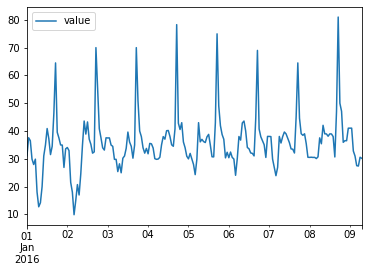

In [46]:
df[:200].plot()

In [130]:
dir_name = "data/external/day_ahead_prices/germany"
max_year=2021
data_list = []
for file in glob.glob(dir_name+"/*.xlsx"):
    if int(file[:-5][-4:]) < max_year+1:
        tmp = pd.read_excel(file, index_col=0)
        print(file[:-5][-4:])
        print(tmp.columns)
        print("===")
        data_list.append(tmp)

prices = pd.concat(data_list).sort_index()
#prices.index = pd.to_datetime(prices.index)

2019
Index(['value'], dtype='object')
===
2016
Index(['value'], dtype='object')
===
2018
Index(['value'], dtype='object')
===
2020
Index(['value'], dtype='object')
===
2021
Index(['value'], dtype='object')
===
2017
Index(['value'], dtype='object')
===


In [131]:
for df in data_list:
    print(df.value.isna().sum())

0
0
22
0
6240
24


In [122]:
prices.index = pd.to_datetime(prices.index)

In [117]:
prices["day-1"] = prices["value"].shift(1)
prices["day+1"] = prices["value"].shift(-1)
prices["week_day"] = prices.index.day_of_week+1
prices["weekend"] = np.where(prices["week_day"].isin([6, 7], 1, 0))

In [123]:
prices["value"][-21:]

2021-12-31 03:00:00   NaN
2021-12-31 04:00:00   NaN
2021-12-31 05:00:00   NaN
2021-12-31 06:00:00   NaN
2021-12-31 07:00:00   NaN
2021-12-31 08:00:00   NaN
2021-12-31 09:00:00   NaN
2021-12-31 10:00:00   NaN
2021-12-31 11:00:00   NaN
2021-12-31 12:00:00   NaN
2021-12-31 13:00:00   NaN
2021-12-31 14:00:00   NaN
2021-12-31 15:00:00   NaN
2021-12-31 16:00:00   NaN
2021-12-31 17:00:00   NaN
2021-12-31 18:00:00   NaN
2021-12-31 19:00:00   NaN
2021-12-31 20:00:00   NaN
2021-12-31 21:00:00   NaN
2021-12-31 22:00:00   NaN
2021-12-31 23:00:00   NaN
Name: value, dtype: float64

In [42]:
idx = pd.date_range("2019-01-01 00:00:00", "2019-12-31 23:00:00", freq="H")

In [43]:
len(idx)

8760

In [31]:
8737+24

8761

In [92]:
dict_data = {
    "france":[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "germany":[2016, 2017, 2018, 2019, 2020, 2021],
    "uk":[2016, 2017, 2018, 2019, 2020]
}

In [93]:
%%time
for country in dict_data:
    for y in dict_data[country]:
        _ = convert_prices_df(country, y, save=True)

       value val2            datetime
0      49.56  NaN 2021-03-18 00:00:00
1      48.17  NaN 2021-03-18 01:00:00
2      47.94  NaN 2021-03-18 02:00:00
3      47.03  NaN 2021-03-18 03:00:00
4      51.53  NaN 2021-03-18 04:00:00
...      ...  ...                 ...
8755  300.00  NaN 2021-11-23 19:00:00
8756  265.14  NaN 2021-11-23 20:00:00
8757  239.05  NaN 2021-11-23 21:00:00
8758  233.42  NaN 2021-11-23 22:00:00
8759  215.45  NaN 2021-11-23 23:00:00

[8760 rows x 3 columns]
CPU times: user 48.4 s, sys: 208 ms, total: 48.7 s
Wall time: 48.7 s


## Play with datetime

In [45]:
list(map(str, pd.date_range("2015-01-04", "2015-12-31")))

['2015-01-04 00:00:00',
 '2015-01-05 00:00:00',
 '2015-01-06 00:00:00',
 '2015-01-07 00:00:00',
 '2015-01-08 00:00:00',
 '2015-01-09 00:00:00',
 '2015-01-10 00:00:00',
 '2015-01-11 00:00:00',
 '2015-01-12 00:00:00',
 '2015-01-13 00:00:00',
 '2015-01-14 00:00:00',
 '2015-01-15 00:00:00',
 '2015-01-16 00:00:00',
 '2015-01-17 00:00:00',
 '2015-01-18 00:00:00',
 '2015-01-19 00:00:00',
 '2015-01-20 00:00:00',
 '2015-01-21 00:00:00',
 '2015-01-22 00:00:00',
 '2015-01-23 00:00:00',
 '2015-01-24 00:00:00',
 '2015-01-25 00:00:00',
 '2015-01-26 00:00:00',
 '2015-01-27 00:00:00',
 '2015-01-28 00:00:00',
 '2015-01-29 00:00:00',
 '2015-01-30 00:00:00',
 '2015-01-31 00:00:00',
 '2015-02-01 00:00:00',
 '2015-02-02 00:00:00',
 '2015-02-03 00:00:00',
 '2015-02-04 00:00:00',
 '2015-02-05 00:00:00',
 '2015-02-06 00:00:00',
 '2015-02-07 00:00:00',
 '2015-02-08 00:00:00',
 '2015-02-09 00:00:00',
 '2015-02-10 00:00:00',
 '2015-02-11 00:00:00',
 '2015-02-12 00:00:00',
 '2015-02-13 00:00:00',
 '2015-02-14 00:

In [62]:
result_df = result_df.sort_values('datetime')

In [75]:
result_df["datetime"]

4944   2015-01-04 00:00:00
4945   2015-01-04 01:00:00
4946   2015-01-04 02:00:00
4947   2015-01-04 03:00:00
4948   2015-01-04 04:00:00
               ...        
3763   2015-12-31 19:00:00
3764   2015-12-31 20:00:00
3765   2015-12-31 21:00:00
3766   2015-12-31 22:00:00
3767   2015-12-31 23:00:00
Name: datetime, Length: 8688, dtype: datetime64[ns]

In [74]:
result_df.set_index('datetime').join(s1)

AttributeError: 'Timestamp' object has no attribute 'index'

In [73]:
s1

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               ...
               '2015-12-30 15:00:00', '2015-12-30 16:00:00',
               '2015-12-30 17:00:00', '2015-12-30 18:00:00',
               '2015-12-30 19:00:00', '2015-12-30 20:00:00',
               '2015-12-30 21:00:00', '2015-12-30 22:00:00',
               '2015-12-30 23:00:00', '2015-12-31 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=8737, freq='H')

In [72]:
s1 = pd.DatetimeIndex(pd.date_range("2015-01-01", "2015-12-31", freq="H"), name="datetime")

In [271]:
l1 = list(map(str, list(result_df.datetime.sort_values())))
l2 = list(map(str, pd.date_range("2018-01-01", "2018-12-31", freq="H")))
[_ for _ in l2 if _ not in l1]

[]